# Searching & downloading *Kepler*, *K2*, and *TESS* data

## Learning Goals

By the end of this tutorial, you will:

* Understand the data products available to query and download.
* Be able to use [Lightkurve](https://docs.lightkurve.org) to search for *Kepler*/*K2* and *TESS* data products.
* Know how to download *TESS* Full Frame Image cutouts.
* Be able to perform a cone search.

## Introduction

The [Lightkurve](https://docs.lightkurve.org) Python package has functions to search for and download observations from *Kepler*/*K2* and *TESS*. These tools are built to make accessing space telescope data clear and straightforward, with intuitive method and keyword names.

This tutorial outlines what data products are available to query with Lightkurve, and gives examples of how to use the functions to search for and download space telescope observations.

## Imports

This tutorial requires the [**Lightkurve**](http://docs.lightkurve.org/) package, which uses [**Matplotlib**](https://matplotlib.org/) for plotting.

In [1]:
import lightkurve as lk
import matplotlib.pyplot as plt
%matplotlib inline

---

## 1. What Data Products are Available?

*Kepler*/*K2* and *TESS* data products are stored on the Mikulski Archive for Space Telescopes (MAST) in two main forms:

* **Light curve products**: tables containing the measured flux at each observation time.
* **Target pixel file products**: stacks of images with the pixel-level observation at each observation time.

There are also the following additional products available to query and download using [Lightkurve](http://docs.lightkurve.org/):

* **High Level Science Products (HLSPs)**: a specific version of a data product produced by an analysis or photometry pipeline. Lightkurve has access to HLSP light curves produced by the photometry pipelines [EVEREST](https://archive.stsci.edu/hlsp/everest), [K2SFF](https://archive.stsci.edu/hlsp/k2sff), and [K2SC](https://arxiv.org/abs/1603.09167). For more information about HLSPs, please see [this article](https://archive.stsci.edu/hlsp/) on the Space Telescope Science Institute's archive.
* **Full Frame Images (FFIs)**: a download of all active detector pixels at once. *TESS* FFIs are captured with 30-minute cadence, and custom cutouts of *TESS* FFIs can be queried and downloaded using [Lightkurve](http://docs.lightkurve.org/).

Lightkurve allows you to query and download each of these data products. The following sections contain examples of how to use the search functions in Lightkurve.

## 2. Searching for Light Curves

Lightkurve uses [Astroquery](https://astroquery.readthedocs.io/en/latest/) to search for data products. Astroquery allows searches based on a target's coordinates, catalog ID number, or name.

This is passed into the search function using the `target` keyword, and all valid inputs for identifying a target include:
    
  * The name of the object as a string, for example, "Kepler-10."
  * The KIC or EPIC identifier as an integer, for example, "11904151."
  * A coordinate string in decimal format, for example, "285.67942179 +50.24130576."
  * A coordinate string in sexagesimal format, for example, "19:02:43.1 +50:14:28.7."
  * An `astropy.coordinates.SkyCoord` object.

You can also specify which mission you would like to retrieve data from using the `mission` keyword, which takes "Kepler," "K2," or "TESS." By default, all available missions will be returned.

We will start with the case of searching for a *Kepler* target using its Kepler Input Catalog (KIC) ID number. Below, we search for [KIC 3733346](https://arxiv.org/pdf/1001.0417.pdf), an [RR Lyrae star](https://en.wikipedia.org/wiki/RR_Lyrae_variable), using the [search_lightcurve](https://docs.lightkurve.org/reference/api/lightkurve.search_lightcurve.html?highlight=search_lightcurve) function.

In [2]:
search_result = lk.search_lightcurve('KIC 3733346', author='Kepler')
search_result

#,mission,year,author,exptime,target_name,distance
,,,,s,,arcsec
0,Kepler Quarter 01,2009,Kepler,1800,kplr003733346,0.0
1,Kepler Quarter 02,2009,Kepler,1800,kplr003733346,0.0
2,Kepler Quarter 03,2009,Kepler,1800,kplr003733346,0.0
3,Kepler Quarter 04,2010,Kepler,1800,kplr003733346,0.0
4,Kepler Quarter 05,2010,Kepler,1800,kplr003733346,0.0
5,Kepler Quarter 06,2010,Kepler,1800,kplr003733346,0.0
...,...,...,...,...,...,...
11,Kepler Quarter 11,2012,Kepler,1800,kplr003733346,0.0
12,Kepler Quarter 12,2012,Kepler,1800,kplr003733346,0.0


`search_lightcurve` returns a `SearchResult` table, which contains information about the data products available to download. This search result tells us that KIC 3733346 was observed in *Kepler* Quarters 1–16. 

You can select an individual entry in this search result by indexing the search result.

In [3]:
search_result[0]

#,mission,year,author,exptime,target_name,distance
,,,,s,,arcsec
0,Kepler Quarter 01,2009,Kepler,1800,kplr003733346,0.0


For more information about the available data products, the `SearchResult` has a full table accessible by calling [.table](https://docs.lightkurve.org/reference/api/lightkurve.SearchResult.table.html?highlight=table). This full table contains the columns listed below. Definitions of each of these terms can be found [here](https://mast.stsci.edu/api/v0/_c_a_o_mfields.html).

In [4]:
for column in search_result.table.columns:
  print(column)

dataproduct_type
calib_level
obs_collection
obs_id
target_name
s_ra
s_dec
t_min
t_max
t_exptime
wavelength_region
filters
em_min
em_max
target_classification
obs_title
t_obs_release
instrument_name
proposal_pi
proposal_id
proposal_type
project
sequence_number
provenance_name
s_region
jpegURL
dataURL
dataRights
mtFlag
srcDen
intentType
obsid
objID
exptime
distance
obsID
obs_collection_products
dataproduct_type_products
description
type
dataURI
productType
productGroupDescription
productSubGroupDescription
productDocumentationURL
project_products
prvversion
proposal_id_products
productFilename
size
parent_obsid
dataRights_products
calib_level_products
author
mission
#
year
sort_order


These column names can also be used to search for specific entries in the table.

In [5]:
# import numpy, which we will use to find the desired index in the table
import numpy as np
quarter2_index = np.where(search_result.table['mission'] == 'Kepler Quarter 02')[0]
search_result[quarter2_index]

#,mission,year,author,exptime,target_name,distance
,,,,s,,arcsec
0,Kepler Quarter 02,2009,Kepler,1800,kplr003733346,0.0


You can also narrow down the list of observations when you make the search using the following mission-specific keywords: 
* *Kepler*: `quarter` 
* *K2*: `campaign`
* *TESS*: `sector`

Let's perform the search for KIC 3733346 again, this time specifying that we only want data from *Kepler* Quarter 2.

In [6]:
search_result_q2 = lk.search_lightcurve('KIC 3733346', author='Kepler', quarter=2)
search_result_q2

#,mission,year,author,exptime,target_name,distance
,,,,s,,arcsec
0,Kepler Quarter 02,2009,Kepler,1800,kplr003733346,0.0


### 2.1 Downloading a single light curve

A light curve can be downloaded by calling [.download()](https://docs.lightkurve.org/reference/api/lightkurve.SearchResult.download.html?highlight=download#lightkurve.SearchResult.download). 

In [7]:
lc = search_result_q2.download()
lc

time,flux,flux_err,quality,timecorr,centroid_col,centroid_row,cadenceno,sap_flux,sap_flux_err,sap_bkg,sap_bkg_err,pdcsap_flux,pdcsap_flux_err,sap_quality,psf_centr1,psf_centr1_err,psf_centr2,psf_centr2_err,mom_centr1,mom_centr1_err,mom_centr2,mom_centr2_err,pos_corr1,pos_corr2
,electron / s,electron / s,,d,pix,pix,,electron / s,electron / s,electron / s,electron / s,electron / s,electron / s,,pix,pix,pix,pix,pix,pix,pix,pix,pix,pix
Time,float32,float32,int32,float32,float64,float64,int32,float32,float32,float32,float32,float32,float32,int32,float64,float32,float64,float32,float64,float32,float64,float32,float32,float32
169.7659418421681,9.2319516e+04,9.2697735e+00,0,3.263322e-03,781.81123,786.73051,2977,8.9092305e+04,8.8779488e+00,2.0773477e+03,7.0835429e-01,9.2319516e+04,9.2697735e+00,0,———,———,———,———,781.81123,1.2057812e-04,786.73051,1.4581889e-04,1.0092091e-01,-1.9298431e-01
169.7863760557957,8.9214008e+04,9.1563263e+00,0,3.263836e-03,781.80745,786.73005,2978,8.6126133e+04,8.7672691e+00,2.0793108e+03,7.0831001e-01,8.9214008e+04,9.1563263e+00,0,———,———,———,———,781.80745,1.2411721e-04,786.73005,1.5003627e-04,1.0036582e-01,-1.9279599e-01
169.80681006918894,8.5608195e+04,9.0206089e+00,0,3.264349e-03,781.80376,786.72918,2979,8.2681344e+04,8.6362791e+00,2.0772085e+03,7.0797533e-01,8.5608195e+04,9.0206089e+00,0,———,———,———,———,781.80376,1.2850568e-04,786.72918,1.5526263e-04,1.0042009e-01,-1.9289577e-01
169.8272442823436,8.3063625e+04,8.9255180e+00,0,3.264862e-03,781.80081,786.72913,2980,8.0246992e+04,8.5434341e+00,2.0767546e+03,7.0811391e-01,8.3063625e+04,8.9255180e+00,0,———,———,———,———,781.80081,1.3182692e-04,786.72913,1.5920549e-04,1.0021163e-01,-1.9266903e-01
169.84767829527118,8.4244992e+04,8.9700022e+00,0,3.265375e-03,781.80242,786.72905,2981,8.1373969e+04,8.5879698e+00,2.0805510e+03,7.0775980e-01,8.4244992e+04,8.9700022e+00,0,———,———,———,———,781.80242,1.3028238e-04,786.72905,1.5737538e-04,1.0010726e-01,-1.9241102e-01
169.86811250773462,9.7360805e+04,9.4567146e+00,0,3.265888e-03,781.81441,786.73210,2982,9.3887734e+04,9.0560179e+00,2.0782170e+03,7.0836788e-01,9.7360805e+04,9.4567146e+00,0,———,———,———,———,781.81441,1.1529749e-04,786.73210,1.3958653e-04,9.8970458e-02,-1.9224431e-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
258.34491414348304,9.0934453e+04,9.2037315e+00,0,2.595223e-03,781.66006,787.06733,7312,8.6663805e+04,8.7947636e+00,2.1399746e+03,7.0873111e-01,9.0934453e+04,9.2037315e+00,0,———,———,———,———,781.66006,1.2442317e-04,787.06733,1.4701700e-04,-5.1297914e-02,1.4743482e-01


This returns a single `KeplerLightCurve` object, which is shown above in the form of an `astropy` table. We can examine the light curve using the `plot` method.

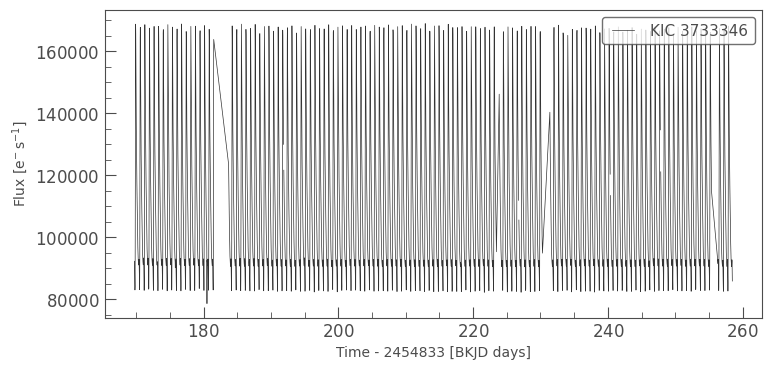

In [8]:
lc.plot();

### 2.2 Downloading a collection of light curves

The `SearchResult` object also has a [download_all](https://docs.lightkurve.org/reference/api/lightkurve.SearchResult.download_all.html?highlight=download_all) method, allowing you to download multiple light curves. This returns a `LightCurveCollection`, a convenient container for `LightCurve` objects.

In [9]:
lc_collection = search_result[:5].download_all()
lc_collection

LightCurveCollection of 5 objects:
    0: <KeplerLightCurve LABEL="KIC 3733346" QUARTER=1 AUTHOR=Kepler FLUX_ORIGIN=pdcsap_flux>
    1: <KeplerLightCurve LABEL="KIC 3733346" QUARTER=2 AUTHOR=Kepler FLUX_ORIGIN=pdcsap_flux>
    2: <KeplerLightCurve LABEL="KIC 3733346" QUARTER=3 AUTHOR=Kepler FLUX_ORIGIN=pdcsap_flux>
    3: <KeplerLightCurve LABEL="KIC 3733346" QUARTER=4 AUTHOR=Kepler FLUX_ORIGIN=pdcsap_flux>
    4: <KeplerLightCurve LABEL="KIC 3733346" QUARTER=5 AUTHOR=Kepler FLUX_ORIGIN=pdcsap_flux>

The `LightCurveCollection` has a number of useful functions for plotting and manipulating the light curves. For more information about how to combine multiple light curves, please see the tutorial on combining multiple quarters of *Kepler* observations.

One of the methods the collection enables you to use is `plot`, making it possible to quickly visualize all observations in your collection.

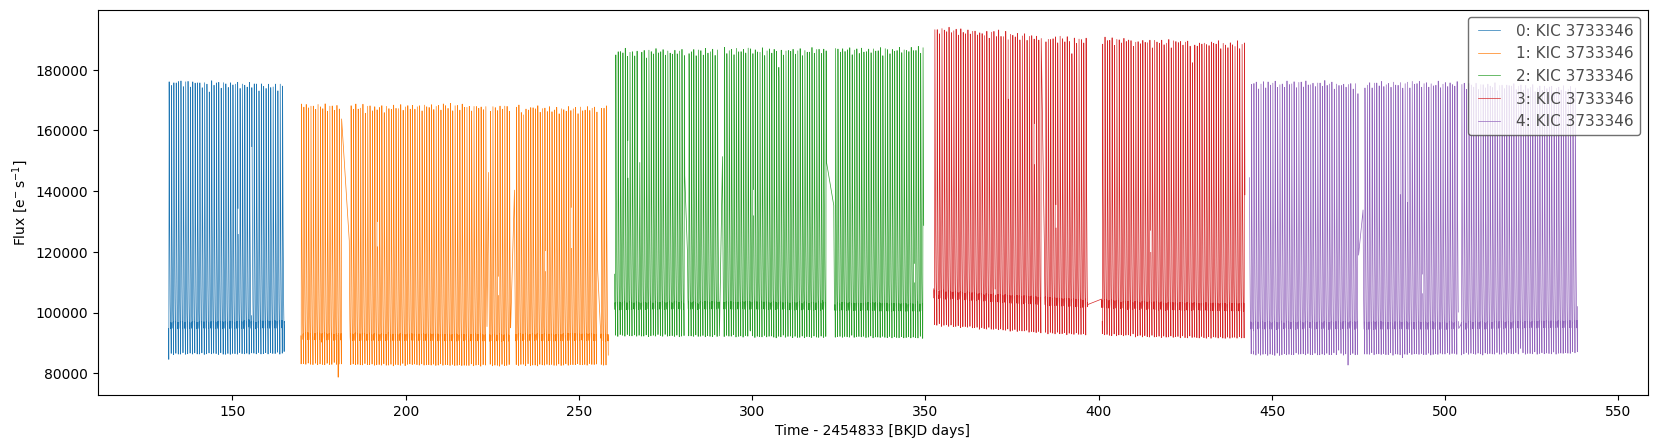

In [10]:
# Create a larger figure for clarity
fig, ax = plt.subplots(figsize=(20,5))
# Plot the light curve collection
lc_collection.plot(ax=ax);

You can also iterate through a collection to label them more clearly and to perform additional actions like normalization.

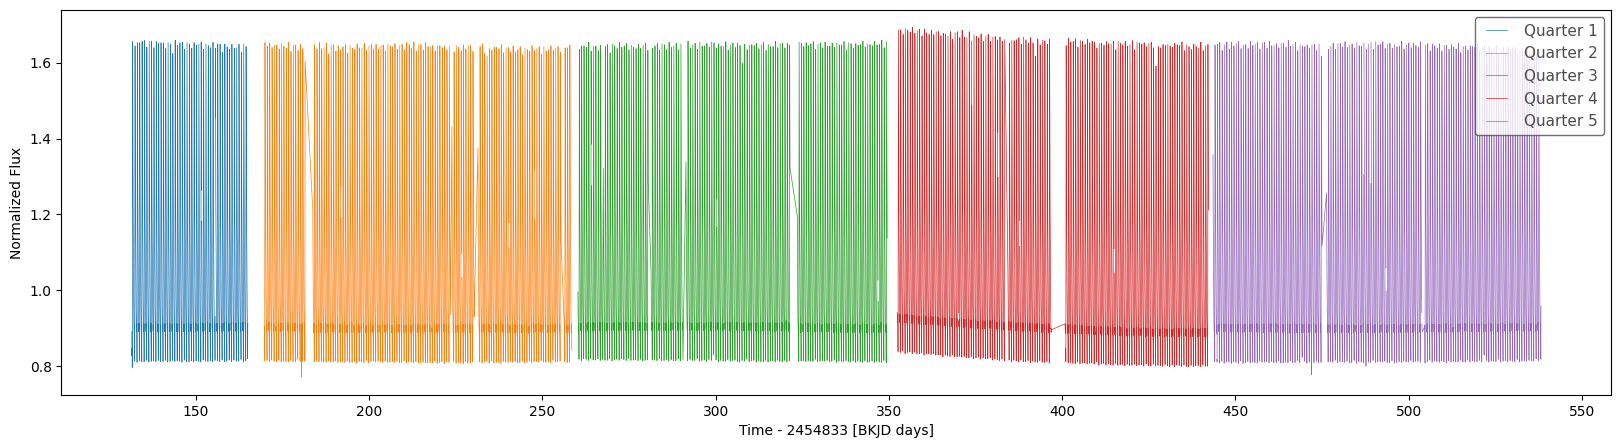

In [11]:
fig, ax = plt.subplots(figsize=(20,5))
for lc in lc_collection:
  lc.normalize().plot(ax=ax, label=f'Quarter {lc.quarter}');

## 3. Searching for Target Pixel Files

The other primary data product used by Lightkurve is the [TargetPixelFile](https://heasarc.gsfc.nasa.gov/docs/tess/data-products.html#target-pixel-files-tpfs), or TPF. A TPF is a stack of images containing the flux in each pixel at each cadence.

Similar to the approach above, we can use the [search_targetpixelfile](https://docs.lightkurve.org/reference/api/lightkurve.search_targetpixelfile.html?highlight=search_targetpixelfile) method to identify available observations.

In [12]:
search_result = lk.search_targetpixelfile('K2-199', exptime=1800)
search_result

#,mission,year,author,exptime,target_name,distance
,,,,s,,arcsec
0,K2 Campaign 06,2015,K2,1800,ktwo212779596,0.0
1,K2 Campaign 17,2018,K2,1800,ktwo212779596,0.0


This returns a table which contains the same information as a light curve search result.

### 3.1 Downloading a single target pixel file

When you call `download` on a search result containing more than one entry, it will download only the first entry in the search result. Lightkurve will raise a friendly warning to let you know when this occurs.

In [13]:
tpf = search_result.download()

/Users/chedges/repos/lightkurve/src/lightkurve/search.py:414: LightkurveWarning: Warning: 2 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
  warnings.warn(


We can view a single cadence of the TPF using the `plot` method.

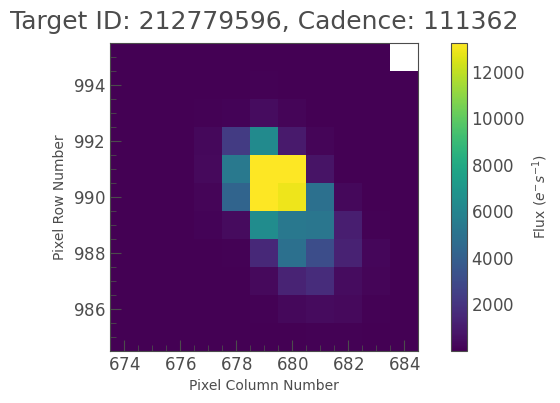

In [14]:
tpf.plot();

If we want to turn the TPF into a light curve, there is a [to_lightcurve](https://docs.lightkurve.org/reference/api/lightkurve.KeplerTargetPixelFile.to_lightcurve.html?highlight=to_lightcurve) method. 

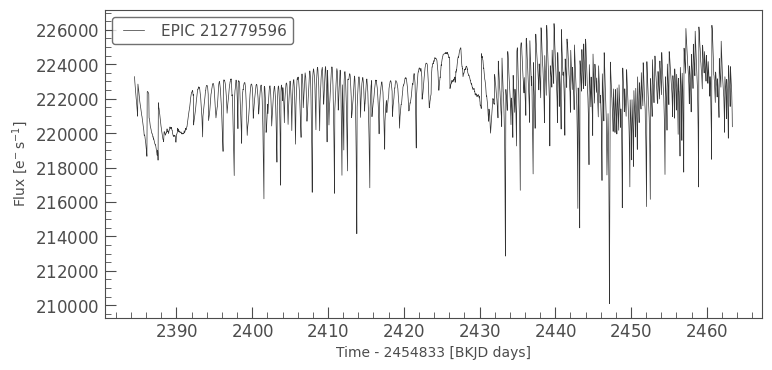

In [15]:
lc = tpf.to_lightcurve()
lc.plot();

For more information about using and plotting TPFs, please see the tutorials on using *Kepler* target pixel file products with Lightkurve and plotting *Kepler* target pixel file products with Lightkurve.

### 3.2 Downloading a collection of target pixel files

You can also download multiple TPFs at a time using the `download_all` method, which returns a `TargetPixelFileCollection`.

In [16]:
tpf_collection = search_result.download_all()
tpf_collection

TargetPixelFileCollection of 2 objects:
    0: KeplerTargetPixelFile Object (ID: 212779596)
    1: KeplerTargetPixelFile Object (ID: 212779596)

A single cadence of each of these TPFs can be inspected with the `plot` method.

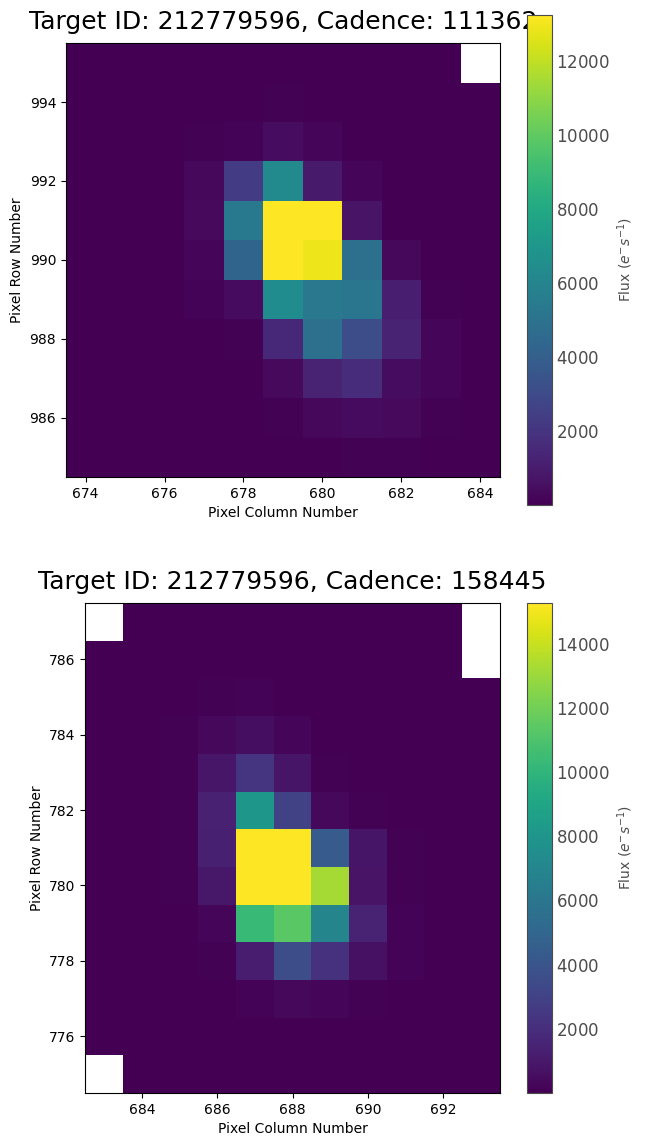

In [17]:
tpf_collection.plot();

## 4. Searching for *TESS* Full Frame Image (FFI) Cutouts

It is also possible to download targets observed in the *TESS* Full Frame Images (FFIs) using Lightkurve. This is done using [search_tesscut](https://docs.lightkurve.org/reference/api/lightkurve.search_tesscut.html?highlight=search_tesscut), which utilizes the [TESSCut](https://mast.stsci.edu/tesscut/) tool ([Brasseur et. al 2019](https://ui.adsabs.harvard.edu/abs/2019ascl.soft05007B/abstract)).

In [18]:
search_result = lk.search_tesscut('Pi Men')
search_result

#,mission,year,author,exptime,target_name,distance
,,,,s,,arcsec
0,TESS Sector 01,2018,TESScut,1426,Pi Men,0.0
1,TESS Sector 04,2018,TESScut,1426,Pi Men,0.0
2,TESS Sector 08,2019,TESScut,1426,Pi Men,0.0
3,TESS Sector 11,2019,TESScut,1426,Pi Men,0.0
4,TESS Sector 12,2019,TESScut,1426,Pi Men,0.0
5,TESS Sector 13,2019,TESScut,1426,Pi Men,0.0
6,TESS Sector 27,2020,TESScut,475,Pi Men,0.0
7,TESS Sector 28,2020,TESScut,475,Pi Men,0.0
8,TESS Sector 31,2020,TESScut,475,Pi Men,0.0


*TESS* FFI cutouts are downloaded as `TargetPixelFile` objects. This is done using the same download function as above, but it now takes an additional argument `cutout_size`, which describes the number of pixels along the side of the cutout, and can be an `int` or a `tuple`.

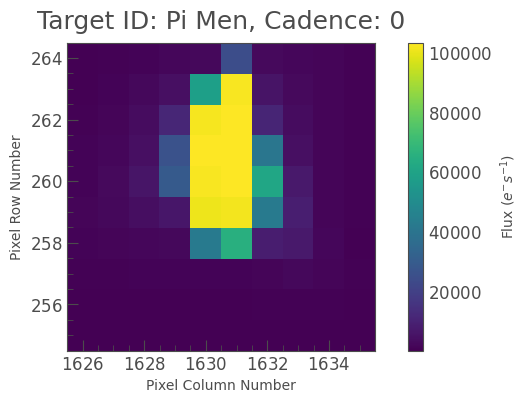

In [19]:
tpf_cutout = search_result[0].download(cutout_size=10)
tpf_cutout.plot();

## 5. Performing a Cone Search

If you are interested in identifying a number of nearby targets, you can perform a cone search, which will return all available targets within a cone of a specfied radius on the sky. The radius can be either a `float` or an [astropy.units.Quantity](https://docs.astropy.org/en/stable/units/) object. If a float is given, it will be assumed to be in units of arcseconds.  If `None` then we default to 0.0001 arcsec.

In [20]:
search_result = lk.search_targetpixelfile('Trappist-1', radius=180., campaign=12, exptime=1800)
print(search_result)

SearchResult containing 3 data products.

 #     mission     year author exptime  target_name  distance
                                  s                   arcsec 
--- -------------- ---- ------ ------- ------------- --------
  0 K2 Campaign 12 2016     K2    1800 ktwo246199087      0.0
  1 K2 Campaign 12 2016     K2    1800 ktwo200164267     12.1
  2 K2 Campaign 12 2016     K2    1800 ktwo246199173     95.5


The `distance` column describes the distance on the sky in arcseconds from the target or coordinates passed into the search.

## About this Notebook

**Authors**: Nicholas Saunders (nksaun@hawaii.edu)

**Updated**: September 28, 2020

## Citing Lightkurve and Astropy

If you use `lightkurve` or its dependencies in your published research, please cite the authors. Click the buttons below to copy BibTeX entries to your clipboard.

In [21]:
lk.show_citation_instructions()

<img style="float: right;" src="https://raw.githubusercontent.com/spacetelescope/notebooks/master/assets/stsci_pri_combo_mark_horizonal_white_bkgd.png" alt="Space Telescope Logo" width="200px"/>
